In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from aquaponics import Aquaponics
imode = 7

In [9]:
a = Aquaponics(
    'plant', 'bacteria', 'nitrogen', 
    NH3_0=100, ppb0=30, beds=[(0,30), (30, 60), (60, 90)], kswitch=100
)
m = a.get_model()

tf = 90
steps = tf * 12 + 1
m.time = np.linspace(0,tf,steps)

start = time()
a.solve(glamdring=True, imode=imode, disp=False)
print('Solved in {:.2f} Seconds'.format(time() - start))

Solved in 14.54 Seconds


Text(0.5,0,'Time (days)')

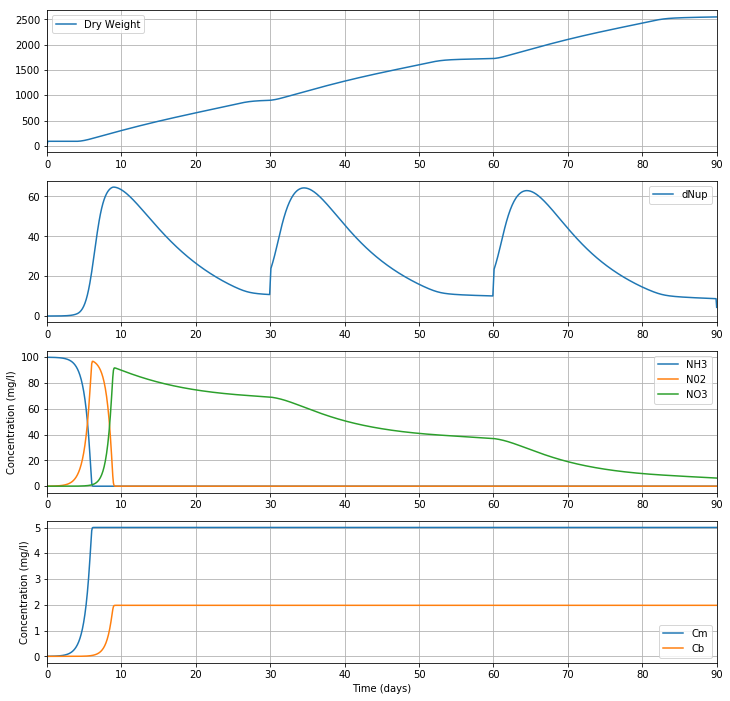

In [10]:
%matplotlib inline
plt.figure(figsize=(12,12))
ax = plt.subplot(411)
plt.plot(m.time, a.w, label='Dry Weight')
plt.grid()
plt.legend()

plt.subplot(412, sharex=ax)
plt.plot(m.time, a.dNup, label='dNup')
plt.grid()
plt.legend()

plt.subplot(413, sharex=ax)
plt.plot(m.time, a.NH3, label='NH3')
plt.plot(m.time, a.NO2, label='N02')
plt.plot(m.time, a.NO3, label='NO3')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

plt.subplot(414, sharex=ax)
plt.plot(m.time, a.Cm, label='Cm')
plt.plot(m.time, a.Cb, label='Cb')
plt.grid()
plt.legend()
plt.ylabel('Concentration (mg/l)')

plt.xlim(0, tf)
plt.xlabel('Time (days)')